<a href="https://colab.research.google.com/github/Winzen/Analises-Eleicao-2022-Presidencia/blob/main/Grafos/GRAFO_SEGUNDO_TURNO_SUDESTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codigos de formação de tabelas e limpeza de dados

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

url='https://drive.google.com/file/d/1V61Pj62FSsmofMpomI9N0d2scqjO4P90/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]


In [ ]:
df = pd.read_csv(url, encoding="ISO-8859-1", sep=";", date_parser=["dt_carga"])

In [ ]:
####
lula = pd.DataFrame(df[(df["nr_candidato"] == 13) & (df["nm_regiao"] == "SUDESTE")].groupby("nm_municipio")["qt_votos_nominais"].sum())
bolso = pd.DataFrame(df[(df["nr_candidato"] == 22) & (df["nm_regiao"] == "SUDESTE")].groupby("nm_municipio")["qt_votos_nominais"].sum())
###
temp_df = pd.DataFrame(df[df["nm_regiao"] == "SUDESTE"].groupby("nm_municipio")["qt_votos_nominais"].sum())
temp_df = temp_df.sort_values("qt_votos_nominais", ascending=False)
###
temp_df[temp_df["qt_votos_nominais"] >= int(temp_df.mean())]
outro = temp_df[temp_df["qt_votos_nominais"] < int(temp_df.mean())]
###
outros = pd.DataFrame(outro.sum(), index=["Outros"], columns=["qt_votos_nominais"])
outros["qt_votos_nominais"][0] = outro.sum()
outros.index.name = 'nm_municipio'
###
grandes = pd.DataFrame(temp_df[temp_df["qt_votos_nominais"] >= int(temp_df.mean())].sum(), index=["Grandes Municipios"], columns=["qt_votos_nominais"])
grandes["qt_votos_nominais"][0] = temp_df[temp_df["qt_votos_nominais"] >= int(temp_df.mean())].sum()
grandes.index.name = 'nm_municipio'
###
sudeste = pd.DataFrame(temp_df.sum(), index=["SUDESTE"], columns=["qt_votos_nominais"])
sudeste["qt_votos_nominais"][0] = temp_df.sum()
sudeste.index.name = 'nm_municipio'
###
Maiores = temp_df[temp_df["qt_votos_nominais"] >= int(temp_df.mean())]
Maiores = (Maiores.append(outros)).sort_values("qt_votos_nominais", ascending=False)
Maiores = (Maiores.append(grandes)).sort_values("qt_votos_nominais", ascending=False)
Maiores = (Maiores.append(sudeste)).sort_values("qt_votos_nominais", ascending=False)
###
only_big = Maiores
only_big = only_big.drop("SUDESTE")
only_big = only_big.drop("Outros")


# Tabelas Formatadas para a criação do Grafo

## Tabela de dados pura sem limpeza

In [ ]:
df

,ds_cargo,cd_municipio,nm_municipio,nm_regiao,nr_turno,sg_uf,nr_zona,nm_candidato,nr_candidato,sg_partido,ds_sit_totalizacao,qt_votos_nominais,qt_votos_validos,dt_carga
0,Presidente,19,GUAJARÁ-MIRIM,NORTE,2,RO,1,JAIR MESSIAS BOLSONARO,22,PL,Não Eleito,13001,19839,2022-11-04 15:55:26
1,Presidente,19,GUAJARÁ-MIRIM,NORTE,2,RO,1,LUIZ INÁCIO LULA DA SILVA,13,PT,Eleito,6838,19839,2022-11-04 15:55:26
2,Presidente,35,PORTO VELHO,NORTE,2,RO,2,JAIR MESSIAS BOLSONARO,22,PL,Não Eleito,52020,79968,2022-11-04 15:55:26
3,Presidente,35,PORTO VELHO,NORTE,2,RO,2,LUIZ INÁCIO LULA DA SILVA,13,PT,Eleito,27948,79968,2022-11-04 15:55:26
4,Presidente,35,PORTO VELHO,NORTE,2,RO,6,JAIR MESSIAS BOLSONARO,22,PL,Não Eleito,43333,64723,2022-11-04 15:55:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12561,Presidente,99384,CASTRIES,EXTERIOR,2,ZZ,1,LUIZ INÁCIO LULA DA SILVA,13,PT,Eleito,0,0,2022-11-04 15:55:26
12562,Presidente,99430,KINGSTON-JAMAICA,EXTERIOR,2,ZZ,1,JAIR MESSIAS BOLSONARO,22,PL,Não Eleito,10,21,2022-11-04 15:55:26
12563,Presidente,99430,KINGSTON-JAMAICA,EXTERIOR,2,ZZ,1,LUIZ INÁCIO LULA DA SILVA,13,PT,Eleito,11,21,2022-11-04 15:55:26
12564,Presidente,99473,BAREIN,EXTERIOR,2,ZZ,1,JAIR MESSIAS BOLSONARO,22,PL,Não Eleito,25,36,2022-11-04 15:55:26


## Divisão de todos os votos para o Lula

In [ ]:
lula

,qt_votos_nominais
nm_municipio,
ABADIA DOS DOURADOS,2351
ABAETÉ,6302
ABRE CAMPO,5292
ACAIACA,1783
ADAMANTINA,5122
...,...
ÁGUIA BRANCA,3781
ÁLVARES FLORENCE,984
ÁLVARES MACHADO,5724


## Divisão de todos os votos para o Bolsonaro

In [ ]:
bolso

,qt_votos_nominais
nm_municipio,
ABADIA DOS DOURADOS,2160
ABAETÉ,7696
ABRE CAMPO,3665
ACAIACA,787
ADAMANTINA,14937
...,...
ÁGUIA BRANCA,2732
ÁLVARES FLORENCE,1872
ÁLVARES MACHADO,8665


## Soma de votos

In [ ]:
temp_df

,qt_votos_nominais
nm_municipio,
SÃO PAULO,6869405
RIO DE JANEIRO,3663368
BELO HORIZONTE,1538303
GUARULHOS,728923
CAMPINAS,655030
...,...
PRACINHA,1061
NOVA CASTILHO,984
CEDRO DO ABAETÉ,890


## Municipios abaixo da Media de votos

In [ ]:
outro

,qt_votos_nominais
nm_municipio,
ARTUR NOGUEIRA,29911
CAMPO BELO,29676
CAPIVARI,29458
BOM DESPACHO,29408
LOUVEIRA,29376
...,...
PRACINHA,1061
NOVA CASTILHO,984
CEDRO DO ABAETÉ,890


## Soma dos municipios abaixo da media de votos

In [ ]:
outros

,qt_votos_nominais
nm_municipio,
Outros,10956702.0


## Soma dos municipios acima da media de votos

In [ ]:
grandes

,qt_votos_nominais
nm_municipio,
Grandes Municipios,38881060.0


## Soma Geral do Sudeste de Votos

In [ ]:
sudeste

,qt_votos_nominais
nm_municipio,
SUDESTE,49837762.0


## Tabela com os Dados Gerais do Grafo. (Maiores Municipios, Sudeste, Outros)

In [ ]:
Maiores

,qt_votos_nominais
nm_municipio,
SUDESTE,49837762.0
Grandes Municipios,38881060.0
Outros,10956702.0
SÃO PAULO,6869405.0
RIO DE JANEIRO,3663368.0
...,...
PORTO FERREIRA,30687.0
LEOPOLDINA,30686.0
PIRAPORA,30169.0


## Tabela sem o "Outros" e "SUDESTE" (Usada na criação do nx.add_star) 

In [ ]:
only_big

,qt_votos_nominais
nm_municipio,
Grandes Municipios,38881060.0
SÃO PAULO,6869405.0
RIO DE JANEIRO,3663368.0
BELO HORIZONTE,1538303.0
GUARULHOS,728923.0
...,...
PORTO FERREIRA,30687.0
LEOPOLDINA,30686.0
PIRAPORA,30169.0


# Grafo

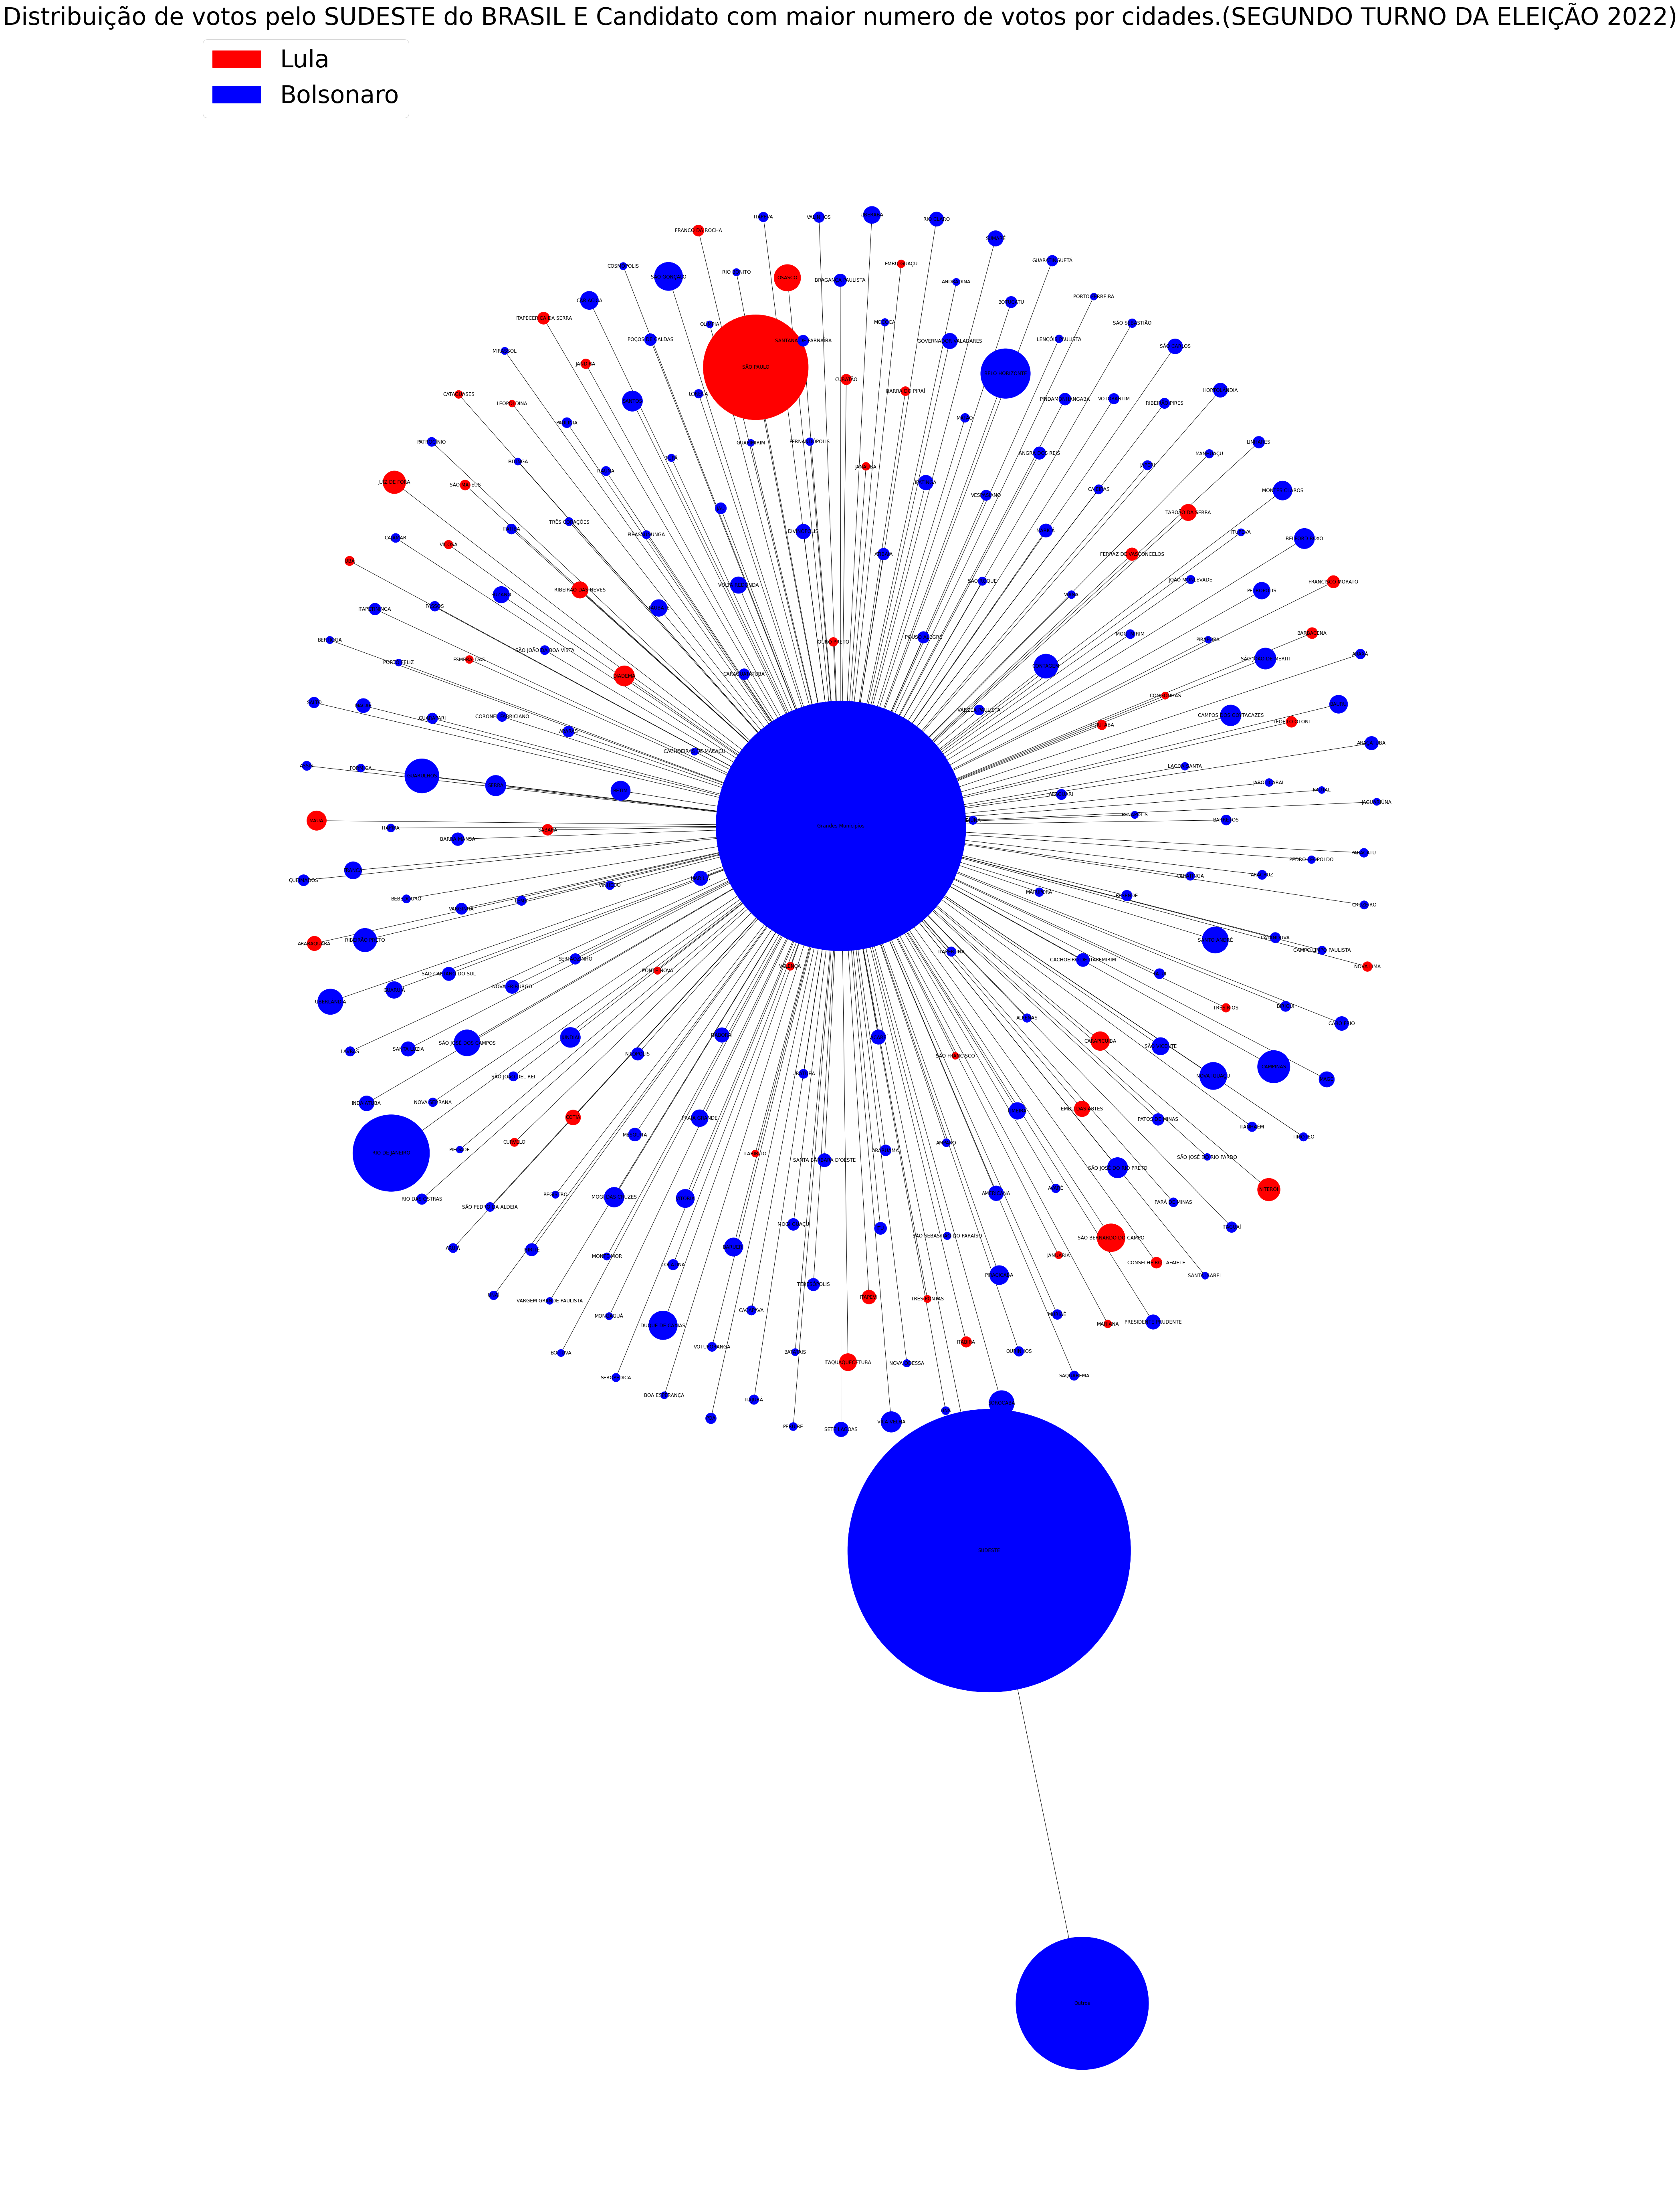

In [ ]:
import networkx as nx
import matplotlib.patches as mpatches

G2 = nx.Graph() 

nx.add_star(G2, only_big.index)
G2.add_edges_from([("Grandes Municipios", "SUDESTE", {'myweight':1}), ("Outros", "SUDESTE", {'myweight':1})])

cor_vertices = {}
bola_tamanho = []
for v in G2.nodes:
  if v not in ["SUDESTE", "Grandes Municipios", "Outros"]:
    if lula.loc[v][0] > bolso.loc[v][0]:
      cor_vertices[v]  = 'red'
    else:
      cor_vertices[v]  = 'blue'
  else:
    cor_vertices[v]  = 'lightgray'

  bola_tamanho.append(Maiores.loc[v][0]/100)

cor_vertices["SUDESTE"] = 'red' if lula.sum()[0] > bolso.sum()[0] else "blue"
cor_vertices["Grandes Municipios"] = 'red' if lula[lula["qt_votos_nominais"] >= int(lula.mean())].sum()[0] > bolso[bolso["qt_votos_nominais"] >= int(bolso.mean())].sum()[0] else "blue"
cor_vertices["Outros"] = 'red' if lula[lula["qt_votos_nominais"] < int(lula.mean())].sum()[0] > bolso[bolso["qt_votos_nominais"] < int(bolso.mean())].sum()[0] else "blue"

pos = nx.spring_layout(G2, k=0.30, iterations=70, weight="myweight", seed=100)

plt.figure(figsize=(45,75))
nx.draw(G2, pos, with_labels=True, node_size=bola_tamanho, node_color=list(cor_vertices.values()), font_color='black')

plt.title("Distribuição de votos pelo SUDESTE do BRASIL E Candidato com maior numero de votos por cidades.(SEGUNDO TURNO DA ELEIÇÃO 2022)", 
          fontsize=60)

red_patch = mpatches.Patch(color='red', label='Lula')
blue_patch = mpatches.Patch(color='blue', label='Bolsonaro')
plt.legend(loc=2, handles=[red_patch, blue_patch], fontsize=60)